## Deutsche Bahn Call-A-Bike Data Preparation and Exploration

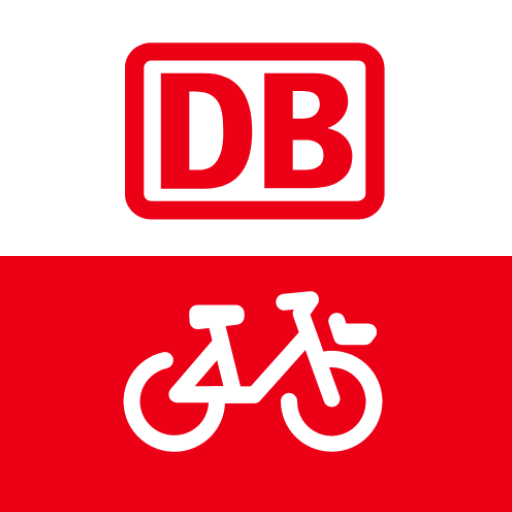



#### 1. Import and examine the data sets
#### 2. Create new columns and flags to aid the analysis¶
* 2.1 Add Year, Month, Week and Weekday Columns
* 2.2 Create a day_trip flag
* 2.3 Create a new column customer_trips and customer_type flag
* 2.4 Create a customers_per_station column and a station_type flag
* 2.5 Create a flag for bikes that have been relocated / inserted
#### 3. Examine and export the df_biketrips datafra
#### 4. Exploratory Data Analysis
* 4.1 Examine the duration_trip_minutes column
* 4.2 Value Counts and Frequency
#### 4. Distribution Plots
* 4.1 Histograms
* 4.2 Distribution Plots
#### 5. Bike Relocations

## 1. Import and examine the data sets

In [1]:
# Import python libraries
from datetime import datetime
from datetime import date
from datetime import time
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

In [2]:
# set the path and import the data

path = r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Data'
df_biketrips = pd.read_pickle(os.path.join(path, 'trips_stations.pkl'))

In [3]:
# view first 25 rows

df_biketrips.head(25)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude,start_station,end_station
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,9.997140,53.550722,U-Bahn Baumwall,Mönckebergstraße / Rosenstraße
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,9.960990,53.562709,Bahnhof Altona Ost/Max-Brauer-Allee,Schulterblatt/Eifflerstraße
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,10.021100,53.584000,Weidestraße/Biedermannplatz,Jarrestraße / Rambatzweg
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,10.029570,53.575652,Mundsburg / Schürbeker Straße,Bartholomäusstraße/Beim Alten Schützenhof
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,10.049568,53.573588,Krausestraße/Eilbektal,Lortzingstraße/Friedrichsberger Straße
5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,3,3,13.016667,NaN,10.020450,53.575308,10.042993,53.586958,Winterhuder Weg/ Zimmerstraße,Wiesendamm/Roggenkamp
6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,4,4,17.450000,NaN,10.013995,53.578035,9.971720,53.581771,Hofweg/Am Langenzug,Eppendorfer Weg/Hoheluftchaussee
7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,4,5,13.966667,NaN,9.977916,53.583795,9.953073,53.577796,Löwenstraße/Eppendorfer Weg,Heußweg/Wiesenstraße
8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,1,1,4.733333,NaN,9.977210,53.578000,9.971720,53.581771,Isestraße / Hoheluftbrücke,Eppendorfer Weg/Hoheluftchaussee
9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,1,1,4.216667,NaN,10.013306,53.554216,10.007652,53.554307,Steindamm / Stralsunder Straße,Hauptbahnhof Ost / Hachmannplatz


In [4]:
# view last 25 rows

df_biketrips.tail(25)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude,start_station,end_station
8265290,46379667,117256,39F4E52592419938DE8906E955B8060E057DE78D,2017-05-15 20:41:50,2017-05-15 20:51:03,140801,208295,2017-05-15,2017-05-15,20,20,9.216667,NaN,10.034100,53.563600,10.058237,53.576238,Wartenau / Lübecker Straße,Krausestraße/Eilbektal
8265291,46379702,119968,7111FF009F27E815EC4D2E1B5E046411906DEB2F,2017-05-15 20:43:17,2017-05-15 20:52:00,131646,213856,2017-05-15,2017-05-15,20,20,8.716667,NaN,9.936005,53.552121,9.914731,53.544302,Bahnhof Altona Ost/Max-Brauer-Allee,Neumühlen/Övelgönne
8265292,46381067,143772,29DF9BC7C5582F28A33B959778D3532738593728,2017-05-15 21:36:41,2017-05-15 21:49:46,252492,213235,2017-05-15,2017-05-15,21,21,13.083330,NaN,9.950708,53.555827,9.981839,53.559762,Thadenstraße/Holstenstraße,St.Petersburger Straße/Bei den Kirchhöfen
8265293,46382537,117550,6A7E1EA7421B080A4A83F7F9E4FABF0B214BC828,2017-05-15 22:50:50,2017-05-15 23:16:11,171372,138387,2017-05-15,2017-05-15,22,23,25.350000,NaN,10.014810,53.522794,10.005400,53.551600,Wilhelmsburger Platz/Zur Schleuse,Mönckebergstraße / Steintorwall
8265294,46382994,119958,114E560D4364344FEF804CA8047C3DD0E81D7FDD,2017-05-15 23:25:22,2017-05-15 23:40:36,138375,248511,2017-05-15,2017-05-15,23,23,15.233330,NaN,10.031800,53.567000,10.050640,53.593726,Lerchenfeld / Uferstraße,Habichtstraße/Steilshooper Straße
8265295,46383356,143585,FA1596CDD83D286B363E839C01C89991E286C452,2017-05-15 23:58:04,2017-05-16 00:07:20,198077,131547,2017-05-15,2017-05-16,23,0,9.266667,NaN,9.982728,53.567845,9.962460,53.554200,Allende-Platz/Grindelhof,Paulinenplatz/Wohlwillstraße
8265296,46379905,119673,714A0E29AF0213C7AAE9866989D4277117A70A23,2017-05-15 20:50:55,2017-05-15 21:11:18,131872,131648,2017-05-15,2017-05-15,20,21,20.383330,NaN,10.004553,53.553676,9.960990,53.562709,Hauptbahnhof West / Glockengießer Wall,Schulterblatt/Eifflerstraße
8265297,46381737,107852,DBDF4D7D3898EA4D7683681D793874E3022E9CC1,2017-05-15 22:06:44,2017-05-15 22:17:44,245204,208307,2017-05-15,2017-05-15,22,22,11.000000,NaN,10.041000,53.601000,10.033690,53.584582,Fuhlsbüttler Straße/Hartzloh,Schleidenstraße/Osterbekstraße
8265298,46381791,107772,D7E83AD73A65907AB8C9EEDE50F66842ACAF711A,2017-05-15 22:09:12,2017-05-15 22:18:07,140801,204031,2017-05-15,2017-05-15,22,22,8.916667,NaN,10.034100,53.563600,10.054679,53.564805,Wartenau / Lübecker Straße,Hasselbrookstraße/Papenstraße
8265299,46381994,143538,2970007E56BBF9AD90E0E6E4CC0FEECD00419F0B,2017-05-15 22:18:17,2017-05-15 22:28:08,131889,244944,2017-05-15,2017-05-15,22,22,9.850000,NaN,9.933870,53.551800,9.918508,53.556710,Bahnhof Altona West / Busbahnhof,Hohenzollernring/Friedensallee


In [5]:
# find the data types

df_biketrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8265315 entries, 0 to 8265314
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   booking_hal_id         object        
 1   vehicle_hal_id         object        
 2   customer_hal_id        object        
 3   datetime_from          datetime64[ns]
 4   datetime_to            datetime64[ns]
 5   start_station_id       object        
 6   end_station_id         object        
 7   date_from              datetime64[ns]
 8   date_to                datetime64[ns]
 9   hour_from              int64         
 10  hour_to                int64         
 11  duration_trip_minutes  float64       
 12  station_status         object        
 13  start_longitude        float64       
 14  start_latitude         float64       
 15  end_longitude          float64       
 16  end_latitude           float64       
 17  start_station          object        
 18  end_station           

In [6]:
# count the unique values in the columns

df_biketrips.nunique()

booking_hal_id           8265315
vehicle_hal_id              2681
customer_hal_id           262527
datetime_from            7716931
datetime_to              7703108
start_station_id             208
end_station_id               208
date_from                   1231
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
station_status                 3
start_longitude              206
start_latitude               205
end_longitude                206
end_latitude                 205
start_station                206
end_station                  206
dtype: int64

In [7]:
# find the number of rows and columns

df_biketrips.shape

(8265315, 19)

The dataframe matches the data that was exported.

## 2. Create new columns and flags to aid the analysis

### 2.1 Add Year, Month, Week and Weekday Columns

In [8]:
# Add a year column
df_biketrips['Year'] = df_biketrips['date_from'].dt.isocalendar().year
df_biketrips['Year']

0          2014
1          2014
2          2014
3          2014
4          2014
           ... 
8265310    2017
8265311    2017
8265312    2017
8265313    2017
8265314    2017
Name: Year, Length: 8265315, dtype: UInt32

In [9]:
# Check the number of entries for each year

df_biketrips['Year'].value_counts()

2016    2807388
2015    2350717
2014    2244713
2017     862497
Name: Year, dtype: Int64

**2017 is only a partial year**<br>
Numbers have increased each year since 2014<br>
The biggest increase approx 500K between 2015 and 2016.

In [10]:
# Add a Month column based on start date

df_biketrips['Month'] = df_biketrips['datetime_from'].dt.month_name()
df_biketrips['Month']

0          January
1          January
2          January
3          January
4          January
            ...   
8265310        May
8265311        May
8265312        May
8265313        May
8265314        May
Name: Month, Length: 8265315, dtype: object

In [11]:
# Check the number of entries for each month

df_biketrips['Month'].value_counts()

May          922378
July         875091
April        873537
August       872290
June         833890
September    785639
March        708189
October      626449
February     478772
November     477790
January      436673
December     374617
Name: Month, dtype: int64

The first trips in the table take place in January and the last take place in May.<br>
**The summer months are the busiest May-August - but need to break it down by year to see the trend due to 2017 being a partial year.**

In [12]:
# Add a Week column based on start date

df_biketrips['Week'] = df_biketrips['date_from'].dt.isocalendar().week
df_biketrips['Week']

0           1
1           1
2           1
3           1
4           1
           ..
8265310    20
8265311    20
8265312    20
8265313    20
8265314    20
Name: Week, Length: 8265315, dtype: UInt32

In [13]:
# Check the number of entries for each week

df_biketrips['Week'].value_counts()

18    242569
19    232994
29    208810
30    208435
33    207443
23    206206
13    205003
17    204697
36    200897
27    199732
31    198060
16    196612
24    194420
15    194121
32    192576
14    192042
21    191495
37    190942
35    189437
28    189228
34    187038
22    184151
38    182840
20    181878
25    181838
26    179126
12    169801
40    160385
39    160055
11    156241
10    151164
44    140520
43    139932
41    139009
9     135102
42    128149
8     120398
7     119633
45    117727
46    111982
47    110813
6     109248
3     107580
4     107332
5     104846
2     104137
50     99693
49     98925
48     94819
51     88358
1      72901
52     52844
53     21131
Name: Week, dtype: Int64

Need to break it down by year to see the trend due to 2017 being a partial year.

In [14]:
# Add a start_day column

df_biketrips['Weekday'] = df_biketrips['datetime_from'].dt.day_name()
df_biketrips['Weekday']

0          Wednesday
1          Wednesday
2          Wednesday
3          Wednesday
4          Wednesday
             ...    
8265310       Monday
8265311       Monday
8265312       Monday
8265313       Monday
8265314       Monday
Name: Weekday, Length: 8265315, dtype: object

In [15]:
# Check the number of entries for each day

df_biketrips['Weekday'].value_counts()

Thursday     1271813
Friday       1258352
Wednesday    1246256
Tuesday      1203742
Monday       1155511
Saturday     1116875
Sunday       1012766
Name: Weekday, dtype: int64

The first trips in the table take place on a Wednesday and the last started on a Monday confirmed using timeanddate.com <br>
**Busiest days Tue - Fri.**

In [16]:
# Checking the new columns 
df_biketrips.head(5)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,...,start_longitude,start_latitude,end_longitude,end_latitude,start_station,end_station,Year,Month,Week,Weekday
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,...,9.980896,53.544279,9.997140,53.550722,U-Bahn Baumwall,Mönckebergstraße / Rosenstraße,2014,January,1,Wednesday
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,...,9.936005,53.552121,9.960990,53.562709,Bahnhof Altona Ost/Max-Brauer-Allee,Schulterblatt/Eifflerstraße,2014,January,1,Wednesday
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,...,10.033846,53.580004,10.021100,53.584000,Weidestraße/Biedermannplatz,Jarrestraße / Rambatzweg,2014,January,1,Wednesday
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,...,10.027100,53.569600,10.029570,53.575652,Mundsburg / Schürbeker Straße,Bartholomäusstraße/Beim Alten Schützenhof,2014,January,1,Wednesday
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,...,10.058237,53.576238,10.049568,53.573588,Krausestraße/Eilbektal,Lortzingstraße/Friedrichsberger Straße,2014,January,1,Wednesday


In [17]:
# Checking the new columns 
df_biketrips.tail(5)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,...,start_longitude,start_latitude,end_longitude,end_latitude,start_station,end_station,Year,Month,Week,Weekday
8265310,46382361,109223,E83B9222C38C025523BE16AB2F00530522EF93CC,2017-05-15 22:38:44,2017-05-15 22:44:26,212607,208307,2017-05-15,2017-05-15,22,...,10.042993,53.586958,10.033690,53.584582,Wiesendamm/Roggenkamp,Schleidenstraße/Osterbekstraße,2017,May,20,Monday
8265311,46382457,116034,6F18F52C068612DC5AE3530A451FC80222F7B4C9,2017-05-15 22:45:13,2017-05-15 22:59:26,131644,243618,2017-05-15,2017-05-15,22,...,9.953400,53.566200,9.944487,53.575573,Eimsbütteler Straße/Waterloostraße,Lappenbergsallee / Bei der Apostelkirche,2017,May,20,Monday
8265312,46382466,117564,4C3C86C70B705E7075399845BFDF571548A50B90,2017-05-15 22:45:47,2017-05-15 23:00:21,213856,131889,2017-05-15,2017-05-15,22,...,9.914731,53.544302,9.933870,53.551800,Neumühlen/Övelgönne,Bahnhof Altona West / Busbahnhof,2017,May,20,Monday
8265313,46382488,120523,02B518FF8F4035D722773AA5A9ED564C89321078,2017-05-15 22:46:54,2017-05-15 23:23:03,131890,244939,2017-05-15,2017-05-15,22,...,9.963824,53.558869,10.057613,53.546932,Neuer Pferdemarkt / Beim Grünen Jäger,Osterbrookplatz/ Süderstraße,2017,May,20,Monday
8265314,46383226,120311,C639C55CFF8334C7C7983E278A9B257B044F00F1,2017-05-15 23:44:43,2017-05-16 00:13:44,140796,131652,2017-05-15,2017-05-16,23,...,10.010000,53.583800,10.024600,53.553300,Goldbekplatz / Semperstraße,Berliner Tor / Berlinertordamm,2017,May,20,Monday


The four new columns have been added with the expected number of variables i.e. 12 months and 7 days.

### 2.2 Create a day_trip flag

In [18]:
# Add an day_status flag to show if the trip was the same day or overnight

df_biketrips.loc[(df_biketrips['date_from'] != df_biketrips['date_to']), 'day_trip'] = 'no'
df_biketrips.loc[(df_biketrips['date_from'] == df_biketrips['date_to']), 'day_trip'] = 'yes'
df_biketrips

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,...,start_latitude,end_longitude,end_latitude,start_station,end_station,Year,Month,Week,Weekday,day_trip
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,...,53.544279,9.997140,53.550722,U-Bahn Baumwall,Mönckebergstraße / Rosenstraße,2014,January,1,Wednesday,yes
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,...,53.552121,9.960990,53.562709,Bahnhof Altona Ost/Max-Brauer-Allee,Schulterblatt/Eifflerstraße,2014,January,1,Wednesday,yes
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,...,53.580004,10.021100,53.584000,Weidestraße/Biedermannplatz,Jarrestraße / Rambatzweg,2014,January,1,Wednesday,yes
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,...,53.569600,10.029570,53.575652,Mundsburg / Schürbeker Straße,Bartholomäusstraße/Beim Alten Schützenhof,2014,January,1,Wednesday,yes
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,...,53.576238,10.049568,53.573588,Krausestraße/Eilbektal,Lortzingstraße/Friedrichsberger Straße,2014,January,1,Wednesday,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265310,46382361,109223,E83B9222C38C025523BE16AB2F00530522EF93CC,2017-05-15 22:38:44,2017-05-15 22:44:26,212607,208307,2017-05-15,2017-05-15,22,...,53.586958,10.033690,53.584582,Wiesendamm/Roggenkamp,Schleidenstraße/Osterbekstraße,2017,May,20,Monday,yes
8265311,46382457,116034,6F18F52C068612DC5AE3530A451FC80222F7B4C9,2017-05-15 22:45:13,2017-05-15 22:59:26,131644,243618,2017-05-15,2017-05-15,22,...,53.566200,9.944487,53.575573,Eimsbütteler Straße/Waterloostraße,Lappenbergsallee / Bei der Apostelkirche,2017,May,20,Monday,yes
8265312,46382466,117564,4C3C86C70B705E7075399845BFDF571548A50B90,2017-05-15 22:45:47,2017-05-15 23:00:21,213856,131889,2017-05-15,2017-05-15,22,...,53.544302,9.933870,53.551800,Neumühlen/Övelgönne,Bahnhof Altona West / Busbahnhof,2017,May,20,Monday,yes
8265313,46382488,120523,02B518FF8F4035D722773AA5A9ED564C89321078,2017-05-15 22:46:54,2017-05-15 23:23:03,131890,244939,2017-05-15,2017-05-15,22,...,53.558869,10.057613,53.546932,Neuer Pferdemarkt / Beim Grünen Jäger,Osterbrookplatz/ Süderstraße,2017,May,20,Monday,yes


In [19]:
# Check the flag

df_biketrips.loc[df_biketrips['day_trip'] == 'no'].loc[:,['booking_hal_id', 'vehicle_hal_id', 'customer_hal_id', 'datetime_from', 'datetime_to', 'start_station', 'end_station', 'duration_trip_minutes', 'day_trip']]

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station,end_station,duration_trip_minutes,day_trip
1835,21371955,119827,12C88348A0CE291BBC1DA7265C5D16804C7B7AFA,2014-01-01 23:51:36,2014-01-02 00:38:09,Wandsbeker Marktstraße/Wandsbeker Marktplatz,Lerchenfeld / Uferstraße,46.550000,no
2132,21371956,119873,EC07F8814B388C8BD86EA1D23598DB9D672FCDB9,2014-01-01 23:53:12,2014-01-02 00:09:35,Sternschanze / Eingang Dänenweg,Königstraße / Struenseestraße,16.383333,no
2401,21371951,120299,37D40E5210434B5922465FD928C8D4F28DBCE0DE,2014-01-01 23:49:26,2014-01-02 00:00:50,Kurt-Schumacher-Allee / Nagelsweg,Wandsbeker Chaussee/Ritterstraße,11.400000,no
2589,21371959,120098,EC07F8814B388C8BD86EA1D23598DB9D672FCDB9,2014-01-01 23:53:33,2014-01-02 00:09:29,Sternschanze / Eingang Dänenweg,Königstraße / Struenseestraße,15.933333,no
3739,21380257,143685,1DA9D0FC7AE68C9DC5D6727C55BB3C0AF77D34AB,2014-01-02 23:45:16,2014-01-03 00:00:26,Methfesselstraße/Luruper Weg,Reeperbahn / Königstraße,15.166667,no
...,...,...,...,...,...,...,...,...,...
8265211,46383138,120556,0BF5D6BEA98AA637E612C6D21ECEDEDE00CCD61F,2017-05-15 23:35:14,2017-05-16 00:46:29,Heußweg/Wiesenstraße,Goebenstraße/Eppendorfer Weg,71.250000,no
8265239,46379152,120636,F873477F840FD44097226FE6445AF610C7E791EB,2017-05-15 20:24:50,2017-05-16 00:32:08,Landungsbrücke/Hafentor,Feldstraße / Marktstraße,247.300000,no
8265295,46383356,143585,FA1596CDD83D286B363E839C01C89991E286C452,2017-05-15 23:58:04,2017-05-16 00:07:20,Allende-Platz/Grindelhof,Paulinenplatz/Wohlwillstraße,9.266667,no
8265304,46383359,109115,30D76581FA2DCB672F6386EC3434F439FD84CDF7,2017-05-15 23:58:21,2017-05-16 00:06:07,U-Bahn Baumwall,Bernhard-Nocht-Straße/Zirkusweg,7.766667,no


In [20]:
# Find any blanks in the new column

df_biketrips['day_trip'].isnull().any()

False

In [21]:
# Find the number of same day trips

df_biketrips['day_trip'].value_counts()

yes    8215052
no       50263
Name: day_trip, dtype: int64

**There are 50263 trips that started on one day and ended on a different day.**

### 2.3 Create a new column customer_trips and customer_type flag

First examine the distribution of the customer_trip data by creating a new dataframe without duplicate customer_hal_id's and then create a customer_type flag based on how frequently customers use the service.

In [22]:
# Calculate the number of trips per customer and map the data back on to the biketrips dataframe

trips = df_biketrips['customer_hal_id'].value_counts()
df_biketrips['customer_trips'] = df_biketrips['customer_hal_id'].map(trips)
df_biketrips.loc[:,['customer_hal_id', 'customer_trips']].head(50)

,customer_hal_id,customer_trips
0,A821059B555C7764A2FF801180874A2FCB326222,7
1,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,59
2,7AD2C1B70137479062A6DD73815835986677BB2D,183
3,4F4F752203EA6FC872D576E9289C4E1B362E16F6,174
4,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,210
5,60A788942F6A49BF54DB9013DB05428F897FCCCE,18
6,708275C3A732D3BD47E97F1E0AC3AE01735FA170,180
7,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,54
8,092D25BAD64832AE3F69488573BA5C398C25B51D,58
9,528147DF06D7074EA517BFAE244FC0E25CB2637C,271


In [23]:
# Find any blanks in the new column

df_biketrips['customer_trips'].isnull().any()

False

In [24]:
# Create a new dataframe without duplicate customer_hal_id

df_customers = df_biketrips.drop_duplicates('customer_hal_id', keep='last')

In [25]:
# Examine the distribution within the customer trips column

df_customers['customer_trips'].describe()

count    262527.000000
mean         31.483676
std          76.192286
min           1.000000
25%           3.000000
50%           8.000000
75%          28.000000
max        2774.000000
Name: customer_trips, dtype: float64

31292 customers are outliers who have made more than 65 trips. [The lower bound -34 is below the minimum 1]
The percentage of outliers is 11.92


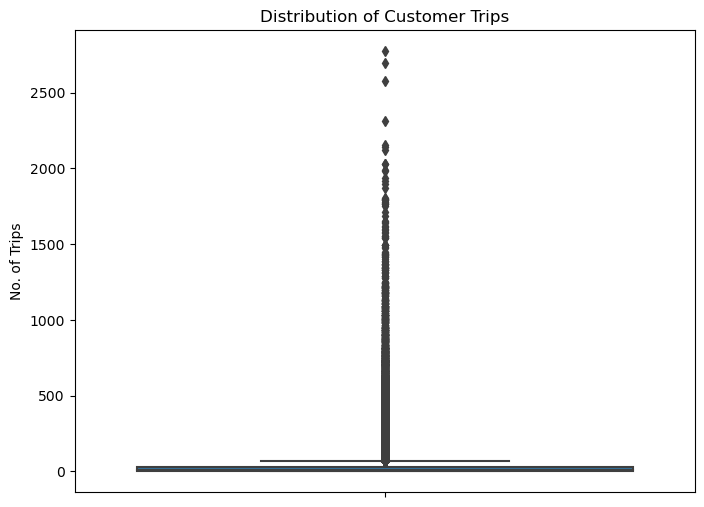

In [26]:
# Find the number of outliers, upper and lower bounds

# Calculate the IQR for the customer_trips column
df = df_customers
column = 'customer_trips'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers

outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

# Create a box plot to visualize the distribution and outliers

plt.figure(figsize =(8, 6))
sns.boxplot(data = df, y = column)
plt.title('Distribution of Customer Trips')
plt.ylabel('No. of Trips')

print(str(outliers.count()) + ' customers are outliers who have made more than ' + str(int(upper_bound)) + ' trips. [The lower bound ' + str(int(lower_bound)) + ' is below the minimum 1]')
print('The percentage of outliers is ' + str((outliers.count()/df[column].count()*100).round(2)))

The customer trip data is positively skewed with the majority of customers (nearly 90%) making between 1 and 64 trips, the median is 8 trips and the mean 31 trips. 

**To create the customer_type flag a low user was defined as 3 trips or below, a typical user between 4 and 28 trips, a frequent user between 29 and 65 trips, and a high user above 65 trips.**

In [27]:
# Create a customer flag for the four different customer groups using the iloc function

# High customers with more than 65 trips
df_biketrips.loc[df_biketrips['customer_trips'] > 65, 'user_type'] = 'High'
# Frequent customers who make between 29 and 65 trips
df_biketrips.loc[(df_biketrips['customer_trips'] <= 65) & (df_biketrips['customer_trips'] > 28), 'user_type'] = 'Frequent'
# Typical customers who make between 4 and 28 trips
df_biketrips.loc[(df_biketrips['customer_trips'] <= 28) & (df_biketrips['customer_trips'] > 3), 'user_type'] = 'Typical'
# Low customers with 3 trips or below
df_biketrips.loc[df_biketrips['customer_trips'] <= 3, 'user_type'] = 'Low'
df_biketrips.loc[:,['customer_hal_id', 'customer_trips', 'user_type']].head(25)

,customer_hal_id,customer_trips,user_type
0,A821059B555C7764A2FF801180874A2FCB326222,7,Typical
1,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,59,Frequent
2,7AD2C1B70137479062A6DD73815835986677BB2D,183,High
3,4F4F752203EA6FC872D576E9289C4E1B362E16F6,174,High
4,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,210,High
5,60A788942F6A49BF54DB9013DB05428F897FCCCE,18,Typical
6,708275C3A732D3BD47E97F1E0AC3AE01735FA170,180,High
7,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,54,Frequent
8,092D25BAD64832AE3F69488573BA5C398C25B51D,58,Frequent
9,528147DF06D7074EA517BFAE244FC0E25CB2637C,271,High


In [28]:
# Find any blanks in the new column

df_biketrips['user_type'].isnull().any()

False

In [29]:
# Find the number of different types of user

users = df_biketrips.groupby('user_type')['customer_hal_id'].nunique()
users

user_type
Frequent     34307
High         31292
Low          79135
Typical     117793
Name: customer_hal_id, dtype: int64

In [30]:
# Calculate the percentage of users
(users / 262527) * 100

user_type
Frequent    13.067989
High        11.919536
Low         30.143566
Typical     44.868909
Name: customer_hal_id, dtype: float64

**One quarter of the 262527 customers using DB call-a-bike used the service more than 29 times and 30% only made up to 3 journeys.**

### 2.4 Create a avg_customers_day column and a station_type flag

In [31]:
# Examine the statistics for the number of customers per day per station
from IPython.display import display, HTML

station_statistics = df_biketrips.groupby(['date_from', 'start_station'])['customer_hal_id'].count().groupby('start_station').agg(['mean', 'median', 'min', 'max']).round()
display(HTML(station_statistics.to_html()))

,mean,median,min,max
start_station,,,,
Allende-Platz/Grindelhof,134.0,135.0,10,276
Alsenstraße/Düppelstraße,66.0,64.0,8,254
Alsterdorf Markt/Evangelische Stiftung,6.0,5.0,1,25
Alsterdorfer Straße/Fuhlsbüttler Straße,14.0,10.0,1,58
Alsterschwimmhalle/Ifflandstraße,36.0,36.0,3,83
Alter Postweg / Heimfelder Straße,10.0,9.0,1,32
Alter Wall/Adolphsbrücke,28.0,26.0,1,86
Am Kaiserkai/Großer Grasbrook,71.0,71.0,1,179
Amsinckstraße/ Nordkanalbrücke,42.0,42.0,1,96


Large variation between stations - use the median.

In [32]:
# Create a column with the median number of customers per station and map it back to the df_biketrips dataframe

avg_customers_day = df_biketrips.groupby(['date_from', 'start_station'])['customer_hal_id'].count().groupby('start_station').median()
df_biketrips['avg_customers_day'] = df_biketrips['start_station'].map(avg_customers_day.round(0))
df_biketrips.loc[:,['start_station', 'avg_customers_day']].head(50)

,start_station,avg_customers_day
0,U-Bahn Baumwall,56.0
1,Bahnhof Altona Ost/Max-Brauer-Allee,73.0
2,Weidestraße/Biedermannplatz,30.0
3,Mundsburg / Schürbeker Straße,92.0
4,Krausestraße/Eilbektal,40.0
5,Winterhuder Weg/ Zimmerstraße,54.0
6,Hofweg/Am Langenzug,63.0
7,Löwenstraße/Eppendorfer Weg,33.0
8,Isestraße / Hoheluftbrücke,60.0
9,Steindamm / Stralsunder Straße,43.0


In [33]:
# Check the new column

df_biketrips['avg_customers_day'].isnull().any()

True

In [34]:
# Create a new dataframe without duplicate customer_hal_id

df_stations = df_biketrips.drop_duplicates('start_station', keep='last')

In [35]:
# Examine the distribution within the customers_station column

df_stations['avg_customers_day'].describe()

count    206.000000
mean      33.131068
std       25.317059
min        2.000000
25%       13.000000
50%       26.000000
75%       48.750000
max      135.000000
Name: avg_customers_day, dtype: float64

2 stations are outliers who have more than 102 customers. [The lower bound -40 is below the minimum possible 0]


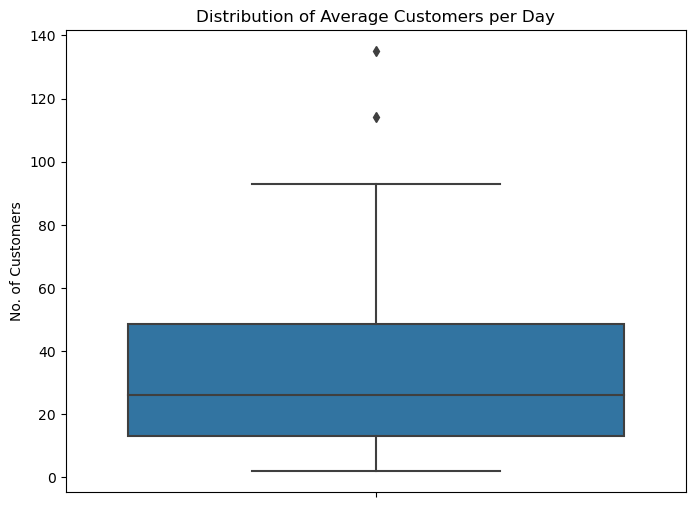

In [36]:
# Find the number of outliers, upper and lower bounds

# Calculate the IQR for the customer_trips column
df = df_stations
column = 'avg_customers_day'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers

outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

# Create a box plot to visualize the distribution and outliers

plt.figure(figsize =(8, 6))
sns.boxplot(data = df, y = column)
plt.title('Distribution of Average Customers per Day')
plt.ylabel('No. of Customers')

print(str(outliers.count()) + ' stations are outliers who have more than ' + str(int(upper_bound)) + ' customers. [The lower bound ' + str(int(lower_bound)) + ' is below the minimum possible 0]')


In [37]:
# Find the station with an average of 2 customers per day
df_stations['start_station'].loc[df_stations['avg_customers_day'] == 2]

8254258        Sieldeich/ Gresham Carat Hotel
8257194    Nordalbinger Weg/Paul-Sorge-Straße
Name: start_station, dtype: object

In [38]:
# Find the outlier stations 
df_stations['start_station'].loc[df_stations['avg_customers_day'] > 102]

8265295       Allende-Platz/Grindelhof
8265306    Schulterblatt/Eifflerstraße
Name: start_station, dtype: object

The minimum average number of customers per day is 2 and the station is Sieldeich/ Gresham Carat Hotel and Nordalbinger Weg/Paul-Sorge-Straße. Low turnover is up to 15 customers per day, Typical turnover between 15 and 51 customers per day, Busy turnover between 52 and 102 customers per day and  a High turnover above 102 customers per day. The outlier statons above 102 are  Allende-Platz/Grindelhof and Schulterblatt/Eifflerstraße.

In [39]:
# Create a station_type flag for the four different customer groups using the iloc function

# High customers with more than 65 trips
df_biketrips.loc[df_biketrips['avg_customers_day'] > 102, 'station_type'] = 'High'
# Frequent customers who make between 29 and 65 trips
df_biketrips.loc[(df_biketrips['avg_customers_day'] <= 102) & (df_biketrips['avg_customers_day'] > 48), 'station_type'] = 'Busy'
# Typical customers who make between 4 and 28 trips
df_biketrips.loc[(df_biketrips['avg_customers_day'] <= 48) & (df_biketrips['avg_customers_day'] > 13), 'station_type'] = 'Typical'
# Low customers with 3 trips or below
df_biketrips.loc[df_biketrips['avg_customers_day'] <= 13, 'station_type'] = 'Low'
df_biketrips.loc[:,['start_station', 'avg_customers_day', 'station_type']].head(25)

,start_station,avg_customers_day,station_type
0,U-Bahn Baumwall,56.0,Busy
1,Bahnhof Altona Ost/Max-Brauer-Allee,73.0,Busy
2,Weidestraße/Biedermannplatz,30.0,Typical
3,Mundsburg / Schürbeker Straße,92.0,Busy
4,Krausestraße/Eilbektal,40.0,Typical
5,Winterhuder Weg/ Zimmerstraße,54.0,Busy
6,Hofweg/Am Langenzug,63.0,Busy
7,Löwenstraße/Eppendorfer Weg,33.0,Typical
8,Isestraße / Hoheluftbrücke,60.0,Busy
9,Steindamm / Stralsunder Straße,43.0,Typical


In [40]:
# Find the number of different types of station

df_biketrips.groupby('station_type')['start_station_id'].nunique()

station_type
Busy       50
High        2
Low        55
Typical    99
Name: start_station_id, dtype: int64

### 2.5 Create a flag for bikes that have been relocated / inserted

The flag is based on the assumption that bikes have been relocated when the end station from the prior trip does not match the start station of the next trip.

In [41]:
# create a new dataframe sorted by vehicle_hal_id and datetime_from in descending order
df_relocated = df_biketrips.sort_values(['vehicle_hal_id', 'datetime_from'])

# use the sorted dataframe to create a dictionary with True when the bikes have been relocated (end station does not eaqual the start station of the next trip)
relocated = df_relocated.groupby('vehicle_hal_id')['end_station_id'].shift(0) != df_relocated.groupby('vehicle_hal_id')['start_station_id'].shift(-1)

# reset the index in the df_biketrips dataframe and then map the relocated dictionary values to the index 
df_biketrips = df_biketrips.reset_index()
df_biketrips['bike_relocated'] = df_biketrips['index'].map(relocated)

df_biketrips.head(15)

,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Year,Month,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated
0,0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,7,Typical,56.0,Busy,False
1,1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,59,Frequent,73.0,Busy,False
2,2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,183,High,30.0,Typical,False
3,3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,174,High,92.0,Busy,False
4,4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,210,High,40.0,Typical,False
5,5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,18,Typical,54.0,Busy,False
6,6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,180,High,63.0,Busy,False
7,7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,54,Frequent,33.0,Typical,False
8,8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,58,Frequent,60.0,Busy,False
9,9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,...,2014,January,1,Wednesday,yes,271,High,43.0,Typical,False


In [42]:
# check the mapping has worked by finding entries 0 - 15 in relocated

relocated.loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
dtype: bool

In [43]:
# use the sorted dataframe to create a dictionary with True when the bikes have been relocated (end station does not eaqual the start station of the next trip)
inserted = df_relocated.groupby('vehicle_hal_id')['start_station_id'].shift(0) != df_relocated.groupby('vehicle_hal_id')['end_station_id'].shift(1)

# map the inserted dictionary values to the index 
df_biketrips['bike_inserted'] = df_biketrips['index'].map(inserted)

df_biketrips.head(15)

,index,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,...,Month,Week,Weekday,day_trip,customer_trips,user_type,avg_customers_day,station_type,bike_relocated,bike_inserted
0,0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,7,Typical,56.0,Busy,False,True
1,1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,59,Frequent,73.0,Busy,False,False
2,2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,183,High,30.0,Typical,False,True
3,3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,174,High,92.0,Busy,False,False
4,4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,210,High,40.0,Typical,False,False
5,5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,18,Typical,54.0,Busy,False,True
6,6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,180,High,63.0,Busy,False,True
7,7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,54,Frequent,33.0,Typical,False,False
8,8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,58,Frequent,60.0,Busy,False,True
9,9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,...,January,1,Wednesday,yes,271,High,43.0,Typical,False,True


In [44]:
# check the mapping has worked by finding entries 0 - 15 in relocated

inserted.loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

0      True
1     False
2      True
3     False
4     False
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
dtype: bool

In [45]:
# check sequential entries for inserted by first printing the dictionary
inserted

7044677     True
7046640     True
7047094    False
7047737    False
7059190     True
           ...  
8257519    False
8258038    False
8258447    False
8261584    False
8262611    False
Length: 8265315, dtype: bool

In [46]:
# then checking the sequential entries match the dictionary
df_biketrips.loc[[7044677, 7046640, 7047094, 7047737, 7059190, 8257519, 8258038, 8258447, 8261584, 8262611], ['index', 'vehicle_hal_id', 'datetime_from', 'datetime_to', 'bike_relocated', 'bike_inserted']]

,index,vehicle_hal_id,datetime_from,datetime_to,bike_relocated,bike_inserted
7044677,7044677,106022,2016-10-27 15:22:32,2016-10-27 15:29:52,True,True
7046640,7046640,106022,2016-10-27 19:04:09,2016-10-27 19:10:43,False,True
7047094,7047094,106022,2016-10-27 19:24:41,2016-10-27 19:32:45,False,False
7047737,7047737,106022,2016-10-27 20:57:31,2016-10-27 21:03:57,True,False
7059190,7059190,106022,2016-10-29 15:18:30,2016-10-29 15:41:47,False,True
8257519,8257519,143866,2017-05-15 15:46:12,2017-05-15 15:54:40,False,False
8258038,8258038,143866,2017-05-15 15:55:05,2017-05-15 16:13:05,False,False
8258447,8258447,143866,2017-05-15 16:16:51,2017-05-15 16:39:04,False,False
8261584,8261584,143866,2017-05-15 18:21:17,2017-05-15 18:34:39,False,False
8262611,8262611,143866,2017-05-15 18:38:50,2017-05-15 18:48:45,True,False


In [47]:
# check sequential entries for relocated with the dataframe above
relocated

7044677     True
7046640    False
7047094    False
7047737     True
7059190    False
           ...  
8257519    False
8258038    False
8258447    False
8261584    False
8262611     True
Length: 8265315, dtype: bool

How may bikes were relocated to another place?

In [48]:
# Compare with the df_biketrips['relocated'] value counts

df_biketrips['bike_relocated'].value_counts()

False    7953903
True      311412
Name: bike_relocated, dtype: int64

How many bikes were inserted into a station?

In [49]:
# Compare with the df_biketrips['inserted'] value counts

df_biketrips['bike_inserted'].value_counts()

False    7953903
True      311412
Name: bike_inserted, dtype: int64

The numbers in the relocated column match the inserted column.

In [50]:
# Which stations were most bikes removed from i.e. where do bikes accumulate?

df_biketrips.groupby('end_station')['bike_relocated'].sum().sort_values(ascending = False)

end_station
Landungsbrücke/Hafentor                            13378
Am Kaiserkai/Großer Grasbrook                       9789
Jungfernstieg / Neuer Jungfernstieg                 9715
Jungfernstieg / Ballindamm                          8366
Mannesallee/Veringstraße                            7163
                                                   ...  
Hugo-Kirchberg-Straße/Tesa                            37
DESY/Notkestraße                                      25
Eißendorfer Pferdeweg/ Asklepios-Klinik Harburg       20
Sieldeich/ Gresham Carat Hotel                        10
Bleickenallee/Kinderkrankenhaus Altona                 9
Name: bike_relocated, Length: 206, dtype: int64

In [51]:
# Which stations were most bikes removed from i.e. where do bikes accumulate?

df_biketrips.groupby('end_station_id')['bike_relocated'].sum().sort_values(ascending = False)

end_station_id
131543    13378
193238     9789
138380     9715
131879     8366
199402     7163
          ...  
250340       37
252487       25
245434       20
268358       10
264330        9
Name: bike_relocated, Length: 208, dtype: int64

In [52]:
#  Which stations were most bikes inserted into i.e. where are bikes in short supply?

df_biketrips.groupby('start_station')['bike_inserted'].sum().sort_values(ascending = False)

start_station
Hauptbahnhof West / Glockengießer Wall    16857
Hauptbahnhof Ost / Hachmannplatz          14598
Bahnhof Altona West / Busbahnhof          10635
Berliner Tor / Berlinertordamm             7648
Bahnhof Altona Ost/Max-Brauer-Allee        7646
                                          ...  
Rahlstedter Weg/Berner Heerweg               27
S Nettelnburg/Friedrich-Frank-Bogen          26
Nordalbinger Weg/Paul-Sorge-Straße           25
Sieldeich/ Gresham Carat Hotel               24
Manshardtstraße/EKZ Manshardtstraße          20
Name: bike_inserted, Length: 206, dtype: int64

In [53]:
#  Which stations were most bikes inserted into i.e. where are bikes in short supply?

df_biketrips.groupby('start_station_id')['bike_inserted'].sum().sort_values(ascending = False)

start_station_id
131872    16857
131873    14598
131889    10635
131652     7648
131646     7646
          ...  
255302       27
254723       26
247847       25
268358       24
252499       20
Name: bike_inserted, Length: 208, dtype: int64

**Look at patterns throughout the day and week to see what is happening.**

In [54]:
# Which bikes were relocated the most?

df_biketrips.groupby('vehicle_hal_id')['bike_relocated'].sum().sort_values(ascending = False)

vehicle_hal_id
143801    243
109363    223
143816    223
109354    220
108165    219
         ... 
108546      3
107854      3
119234      2
106111      2
108631      2
Name: bike_relocated, Length: 2681, dtype: int64

In [55]:
# Which bikes were inserted the most?

df_biketrips.groupby('vehicle_hal_id')['bike_inserted'].sum().sort_values(ascending = False)

vehicle_hal_id
143801    243
109363    223
143816    223
109354    220
108165    219
         ... 
108546      3
107854      3
119234      2
106111      2
108631      2
Name: bike_inserted, Length: 2681, dtype: int64

In [56]:
# Where was bike vehicle_hal_id = 143801 inserted?

df_biketrips[df_biketrips['vehicle_hal_id'] == '143801'].groupby('start_station')['bike_inserted'].sum().sort_values(ascending = False)

start_station
Hauptbahnhof Ost / Hachmannplatz               11
Millerntorplatz/St.Pauli                        9
Enckeplatz / Hütten                             8
Bahnhof Altona West / Busbahnhof                8
Lohmühlenstraße / Steindamm                     7
                                               ..
Dürerstraße/Beslerplatz- S Bahn Othmarschen     0
Eimsbütteler Straße/Waterloostraße              0
Mundsburg / Schürbeker Straße                   0
Emil-Andresen-Straße / Lohkoppelweg             0
Paulinenplatz/Wohlwillstraße                    0
Name: bike_inserted, Length: 175, dtype: int64

In [57]:
# Where was bike vehicle_hal_id = 143801 relocated from?

df_biketrips[df_biketrips['vehicle_hal_id'] == '143801'].groupby('end_station')['bike_relocated'].sum().sort_values(ascending = False)

end_station
Landungsbrücke/Hafentor                   9
Jungfernstieg / Neuer Jungfernstieg       8
Mönckebergstraße / Steintorwall           6
Am Kaiserkai/Großer Grasbrook             6
Bernhard-Nocht-Straße/Zirkusweg           6
                                         ..
Hauptbahnhof West / Glockengießer Wall    0
Hammerbrook / Sachsenfeld                 0
Habichtstraße/Steilshooper Straße         0
Gründgensstraße/César-Klein-Ring          0
Überseering/Mexikoring                    0
Name: bike_relocated, Length: 176, dtype: int64

If there is time look at bike 143801 in more detail and plot the relocations

## 3. Examine and export the df_biketrips dataframe

In [58]:
# check the data types

df_biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8265315 entries, 0 to 8265314
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   booking_hal_id         object        
 2   vehicle_hal_id         object        
 3   customer_hal_id        object        
 4   datetime_from          datetime64[ns]
 5   datetime_to            datetime64[ns]
 6   start_station_id       object        
 7   end_station_id         object        
 8   date_from              datetime64[ns]
 9   date_to                datetime64[ns]
 10  hour_from              int64         
 11  hour_to                int64         
 12  duration_trip_minutes  float64       
 13  station_status         object        
 14  start_longitude        float64       
 15  start_latitude         float64       
 16  end_longitude          float64       
 17  end_latitude           float64       
 18  start_station         

In [59]:
# count the unique values in the columns

df_biketrips.nunique()

index                    8265315
booking_hal_id           8265315
vehicle_hal_id              2681
customer_hal_id           262527
datetime_from            7716931
datetime_to              7703108
start_station_id             208
end_station_id               208
date_from                   1231
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
station_status                 3
start_longitude              206
start_latitude               205
end_longitude                206
end_latitude                 205
start_station                206
end_station                  206
Year                           4
Month                         12
Week                          53
Weekday                        7
day_trip                       2
customer_trips              1069
user_type                      4
avg_customers_day             75
station_type                   4
bike_relocated                 2
bike_inser

In [60]:
# find the number of rows and columns

df_biketrips.shape

(8265315, 31)

In [61]:
# Export the dataframe to both a pickle file and csv
df_biketrips.to_pickle(os.path.join(path, 'biketrips_stations.pkl'))
df_biketrips.to_csv(os.path.join(path, 'biketrips_stations.csv'))

## 4. Exploratory Data Analysis

Looking at the unique values in the data there were:
* 8265315 bookings
* 262527 customers
* 2681 vehicles
* 208 stations (2 missing names and latitude/longitude)

In [62]:
# View the dataframe shape and display all columns

df_biketrips.describe()

,index,hour_from,hour_to,duration_trip_minutes,start_longitude,start_latitude,end_longitude,end_latitude,Year,Week,customer_trips,avg_customers_day
count,8.265315e+06,8.265315e+06,8.265315e+06,8.265315e+06,8.231122e+06,8.231122e+06,8.231724e+06,8.231724e+06,8.265315e+06,8.265315e+06,8.265315e+06,8.231122e+06
mean,4.132657e+06,1.409573e+01,1.426082e+01,1.887645e+01,9.992335e+00,5.356236e+01,9.992560e+00,5.356234e+01,2.015277e+03,2.604133e+01,2.158726e+02,5.439968e+01
std,2.385991e+06,5.389814e+00,5.480330e+00,2.340862e+01,3.462055e-02,2.055907e-02,3.470176e-02,2.064883e-02,9.757254e-01,1.315581e+01,2.997249e+02,2.662303e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,3.016667e+00,9.862013e+00,5.344763e+01,9.862013e+00,5.344763e+01,2.014000e+03,1.000000e+00,1.000000e+00,2.000000e+00
25%,2.066328e+06,1.000000e+01,1.100000e+01,8.266667e+00,9.969250e+00,5.355185e+01,9.969250e+00,5.355180e+01,2.014000e+03,1.600000e+01,4.100000e+01,3.400000e+01
50%,4.132657e+06,1.500000e+01,1.500000e+01,1.345000e+01,9.990110e+00,5.356140e+01,9.990110e+00,5.356140e+01,2.015000e+03,2.600000e+01,1.060000e+02,5.600000e+01
75%,6.198986e+06,1.800000e+01,1.800000e+01,2.133333e+01,1.001502e+01,5.357557e+01,1.001502e+01,5.357557e+01,2.016000e+03,3.600000e+01,2.600000e+02,7.100000e+01
max,8.265314e+06,2.300000e+01,2.300000e+01,2.999833e+02,1.022000e+01,5.365429e+01,1.022000e+01,5.365429e+01,2.017000e+03,5.300000e+01,2.774000e+03,1.350000e+02


The rental hour_from and hour_to variables have similar profiles. The duration_trip_minutes column is skewed by the shorter trips.

### 4.1 Examine the duration_trip_minutes column

488240 trips are outliers which lasted more than 40 minutes. [The lower bound -11 is below the minimum.]
The percentage of outliers is 5.91


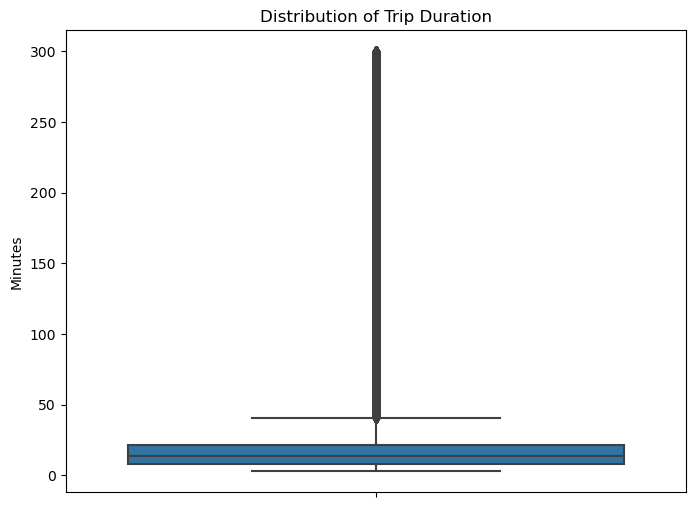

In [63]:
# Find the number of outliers, upper and lower bounds

# Calculate the IQR for the customer_trips column
df = df_biketrips
column = 'duration_trip_minutes'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers

outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]

# Create a box plot to visualize the distribution and outliers

plt.figure(figsize =(8, 6))
sns.boxplot(data = df, y = column)
plt.title('Distribution of Trip Duration')
plt.ylabel('Minutes')

print(str(outliers.count()) + ' trips are outliers which lasted more than ' + str(int(upper_bound)) + ' minutes. [The lower bound ' + str(int(lower_bound)) + ' is below the minimum.]')
print('The percentage of outliers is ' + str((outliers.count()/df[column].count()*100).round(2)))

The  trip duration data is positively skewed with the majority of trips (over 90%) between 3 and 40 minutes, the median is 13.5 minutes and the mean 19 minutes. 

### 4.2 Value Counts and Frequency

In [64]:
# Check the value counts

df_biketrips['Year'].value_counts(normalize=True)

2016    0.339659
2015    0.284407
2014    0.271582
2017    0.104351
Name: Year, dtype: Float64

The number of trips has increased each year (2017 is a partial year).

In [65]:
# Check the value counts

df_biketrips['Month'].value_counts(normalize=True)

May          0.111596
July         0.105875
April        0.105687
August       0.105536
June         0.100890
September    0.095053
March        0.085682
October      0.075793
February     0.057925
November     0.057807
January      0.052832
December     0.045324
Name: Month, dtype: float64

**Over half the trips take place in spring/early summer from the start of April to the end of August** 

In [66]:
# Which vehicles were used most?

vehicle_freq = df_biketrips['vehicle_hal_id'].value_counts(normalize=True)
vehicle_freq.head(30)

116251    0.000636
143619    0.000629
108483    0.000625
119685    0.000623
119882    0.000617
143694    0.000614
119612    0.000612
107353    0.000612
107509    0.000612
108624    0.000611
120000    0.000611
120412    0.000610
117486    0.000609
120408    0.000608
143589    0.000607
119757    0.000607
120354    0.000607
117510    0.000607
143559    0.000607
120330    0.000606
109363    0.000606
143679    0.000602
117495    0.000602
117555    0.000602
109354    0.000600
120358    0.000598
108918    0.000598
143605    0.000597
143722    0.000596
143578    0.000595
Name: vehicle_hal_id, dtype: float64

The five most used vehicles 116251, 143619, 108483, 119685 and 119882

In [67]:
# Which vehicles were used least?

vehicle_freq = df_biketrips['vehicle_hal_id'].value_counts(normalize=True)
vehicle_freq.tail(20)

106033    0.000026
117009    0.000025
107682    0.000024
111020    0.000024
115851    0.000023
109644    0.000021
119984    0.000020
116071    0.000019
106853    0.000019
143402    0.000019
107230    0.000017
113627    0.000015
108546    0.000011
106111    0.000010
106022    0.000009
108631    0.000006
119234    0.000005
109344    0.000005
109370    0.000005
107854    0.000001
Name: vehicle_hal_id, dtype: float64

The five least used vehicles 108631, 109344, 119234, 109370 and 107854

There is not much difference in frequency between the most used vehicles.
* Where were the top 5 parked?
* What journeys did they make?

The 5 least used vehicles.
* Where were they parked? 
* What journeys did they make?
* What years and months of the year?

In [68]:
# Which stations do most trips start from?

start_station_freq = df_biketrips['start_station'].value_counts(normalize=True)
start_station_freq.head(15)

Allende-Platz/Grindelhof                  0.020101
Schulterblatt/Eifflerstraße               0.018642
Goldbekplatz / Semperstraße               0.014840
Jungfernstieg / Ballindamm                0.014732
Mundsburg / Schürbeker Straße             0.014384
Jarrestraße / Rambatzweg                  0.013753
Lange Reihe / Lohmühlenpark               0.013719
Eduard-Rhein-Ufer / Schwanenwik           0.013556
Neuer Pferdemarkt / Beim Grünen Jäger     0.013428
Landungsbrücke/Hafentor                   0.013378
Paulinenplatz/Wohlwillstraße              0.013079
Sternschanze / Eingang Dänenweg           0.012961
Hauptbahnhof Ost / Hachmannplatz          0.012958
Hauptbahnhof West / Glockengießer Wall    0.012727
Jungfernstieg / Neuer Jungfernstieg       0.012561
Name: start_station, dtype: float64

The top five stations customers start out from:
* Allende-Platz/Grindelhof                  
* Schulterblatt/Eifflerstraße               
* Goldbekplatz / Semperstraße               
* Jungfernstieg / Ballindamm                
* Mundsburg / Schürbeker Straße             

In [69]:
# Which stations do most trips end at?

end_station_freq = df_biketrips['end_station'].value_counts(normalize=True)
end_station_freq.head(15)

Allende-Platz/Grindelhof                 0.020338
Schulterblatt/Eifflerstraße              0.018714
Jungfernstieg / Ballindamm               0.015515
Goldbekplatz / Semperstraße              0.015033
Landungsbrücke/Hafentor                  0.014731
Mundsburg / Schürbeker Straße            0.014395
Jarrestraße / Rambatzweg                 0.014040
Eduard-Rhein-Ufer / Schwanenwik          0.013813
Lange Reihe / Lohmühlenpark              0.013593
Jungfernstieg / Neuer Jungfernstieg      0.013581
Neuer Pferdemarkt / Beim Grünen Jäger    0.013442
Paulinenplatz/Wohlwillstraße             0.013278
Sternschanze / Eingang Dänenweg          0.012608
Goebenstraße/Eppendorfer Weg             0.012011
Mönckebergstraße / Steintorwall          0.011799
Name: end_station, dtype: float64

The top five stations customers end up at:
* Allende-Platz/Grindelhof                 
* Schulterblatt/Eifflerstraße              
* Jungfernstieg / Ballindamm              
* Goldbekplatz / Semperstraße              
* Landungsbrücke/Hafentor                  

In [70]:
# Which stations do the least trips start from?

start_station_freq = df_biketrips['start_station'].value_counts(normalize=True)
start_station_freq.tail(15)

Paul-Ehrlich-Straße/Asklepios Klinik Altona    0.000313
Riedweg/Vierbergen                             0.000308
Ohnhorststraße/Klein Flottbek                  0.000288
Charlie-Mills-Straße/Friedrich-Ebert-Damm      0.000288
Neuländer Kamp/Eurofins                        0.000273
Rahlstedter Weg/Berner Heerweg                 0.000260
Traberweg/Eckerkoppel                          0.000255
Billstedter Platz/Öjendorfer Weg               0.000244
Vierlandenstraße/Johann-Adolf-Hasse-Platz      0.000208
S Allermöhe/Walter-Rudolphi-Weg                0.000206
Lohbrügger Markt/Ludwig-Rosenberg-Ring         0.000186
Nordalbinger Weg/Paul-Sorge-Straße             0.000159
Bleickenallee/Kinderkrankenhaus Altona         0.000157
S Nettelnburg/Friedrich-Frank-Bogen            0.000142
Sieldeich/ Gresham Carat Hotel                 0.000011
Name: start_station, dtype: float64

In [71]:
# Which stations do the least trips end from?up at

start_station_freq = df_biketrips['end_station'].value_counts(normalize=True)
start_station_freq.tail(15)

Wentorfer Straße/Bezirksamt Bergedorf              0.000300
Eißendorfer Pferdeweg/ Asklepios-Klinik Harburg    0.000297
Charlie-Mills-Straße/Friedrich-Ebert-Damm          0.000296
Billstedter Platz/Öjendorfer Weg                   0.000286
Neuländer Kamp/Eurofins                            0.000274
Hugo-Kirchberg-Straße/Tesa                         0.000260
Ohnhorststraße/Klein Flottbek                      0.000256
Traberweg/Eckerkoppel                              0.000250
Vierlandenstraße/Johann-Adolf-Hasse-Platz          0.000231
S Allermöhe/Walter-Rudolphi-Weg                    0.000206
Lohbrügger Markt/Ludwig-Rosenberg-Ring             0.000194
Nordalbinger Weg/Paul-Sorge-Straße                 0.000191
S Nettelnburg/Friedrich-Frank-Bogen                0.000157
Bleickenallee/Kinderkrankenhaus Altona             0.000142
Sieldeich/ Gresham Carat Hotel                     0.000010
Name: end_station, dtype: float64

**Plot the stations on a map and hightlight the top and bottom 5 stations - where are they located?**

* Which customers are using them?

In [72]:
# Which customers use the bikes most frequently

customer_freq = df_biketrips['customer_hal_id'].value_counts(normalize=True)
customer_freq.head(25)

496D35CFE3F625730E578793269E52D0A45FE53E    0.000336
7439201395BB2E80301974D4D00100F1F8A7AFB4    0.000326
6DF3E96544415EBFF474F968F264E144772F508E    0.000312
5EBBA60A2178EF837A2A2065E05B1A84C9B4FD94    0.000280
F4B0220EB708EB3C7D2966B0194FA19640B458C5    0.000261
B55462DA30B9D64E617B92DF0A99AC509BCC461B    0.000259
BDBE0F11FE2C06152C2D97FF4B02E02D1D962C6E    0.000256
63D3262EA34B00E18F9A801AE1832C618FD70D49    0.000245
19C08F00C4101E327BF935F49D228C5398AA9F06    0.000245
D56E514389AF41CEE25EB57352A9CAC5D7371006    0.000241
CE5EC6DFC08DEFC65B687715A36BE1869C4645A7    0.000240
915E1886E3065A83BD3868A48F4B55FC58BEE655    0.000234
618A6B33D8581999B1EEEBD938FFBA11B2179259    0.000232
A42F2E774572A161F6D3B6026DA7A85F402AB0B1    0.000229
634B30BC68FC20FAC4E3EAA186EFF1F1A7E4F661    0.000226
8C858F33882A749EF5C3D80EAAD6145967B29BE7    0.000218
3DF2E6871EF2D8DBC937E774279B06680AA3A62D    0.000218
FEB90545808B8DD15AE28DC3868E540510E31D95    0.000217
2208FAEB3F1AB3464A019EEEDCC888DBBE0C35C0    0.

**Investigate the trips made by the top 3 customers**
* 496D35CFE3F625730E578793269E52D0A45FE53E    
* 7439201395BB2E80301974D4D00100F1F8A7AFB4   
* 6DF3E96544415EBFF474F968F264E144772F508E    

Are they all year round? <br>
Are they work trips?


In [73]:
date_from_freq = df_biketrips['date_from'].value_counts(normalize=True)
date_from_freq.head(10)

2016-06-03    0.001671
2016-05-07    0.001659
2016-08-25    0.001656
2016-05-06    0.001651
2016-08-24    0.001640
2016-05-28    0.001631
2016-06-04    0.001629
2016-09-08    0.001604
2016-08-26    0.001602
2017-04-09    0.001594
Name: date_from, dtype: float64

In [74]:
date_to_freq = df_biketrips['date_to'].value_counts(normalize=True)
date_to_freq.head(10)

2016-08-25    0.001656
2016-06-03    0.001654
2016-05-06    0.001644
2016-05-07    0.001644
2016-08-24    0.001636
2016-06-04    0.001628
2016-05-28    0.001625
2017-04-09    0.001600
2016-09-08    0.001600
2016-08-26    0.001591
Name: date_to, dtype: float64

In [75]:
hour_from_freq = df_biketrips['hour_from'].value_counts(normalize=True)
hour_from_freq

17    0.092156
18    0.090400
16    0.077084
19    0.068866
8     0.066463
15    0.066188
14    0.059421
13    0.057718
12    0.051748
20    0.049989
9     0.044721
11    0.038536
21    0.037314
7     0.035289
10    0.032346
22    0.031182
23    0.025901
0     0.020417
1     0.015403
6     0.011046
2     0.010269
3     0.007170
5     0.005192
4     0.005181
Name: hour_from, dtype: float64

In [76]:
hour_to_freq = df_biketrips['hour_to'].value_counts(normalize=True)
hour_to_freq

18    0.094184
17    0.089734
19    0.075563
16    0.074796
15    0.063887
8     0.062047
14    0.058254
20    0.055812
13    0.055600
9     0.050023
12    0.047114
21    0.040585
11    0.033842
22    0.033372
10    0.031858
23    0.028059
7     0.027629
0     0.021383
1     0.016955
2     0.011491
6     0.009164
3     0.007857
4     0.005789
5     0.005004
Name: hour_to, dtype: float64

**The top four hours for starting and ending trips are 16:00 - 19:00  -the commute home?**

In [77]:
start_day_freq = df_biketrips['Weekday'].value_counts(normalize=True)
start_day_freq

Thursday     0.153874
Friday       0.152245
Wednesday    0.150781
Tuesday      0.145638
Monday       0.139802
Saturday     0.135128
Sunday       0.122532
Name: Weekday, dtype: float64

**Wednesday, Thursday and Friday are the most popular days and the weekend the least popular.** <br>
A higher percentage of trips end on Friday and Saturday than are started on those days. More trips taken over midnight?

In [78]:
# Change the working directory and show directory path

os.chdir(path = r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Analysis')
os.getcwd()

'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Analysis'

## 4. Distribution Plots

### 4.1 Histograms

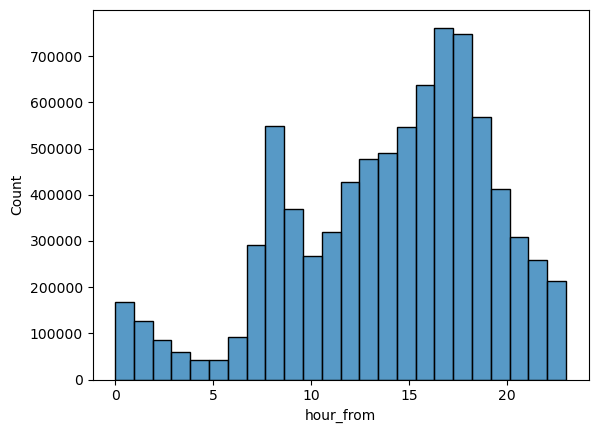

In [79]:
# Create histogram of the hour from column

sns.histplot(data = df_biketrips, x = 'hour_from', bins = 24)

# Exporting the scatter plot with axis showing
plt.savefig("histogram_hour_from.png", bbox_inches='tight') 

plt.show()

<AxesSubplot:xlabel='hour_from', ylabel='hour_from'>

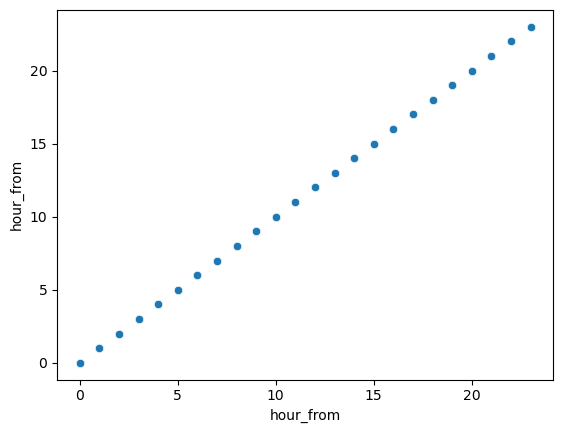

In [80]:
# Create a scatterplot of 'hour_from'to identify gaps

sns.scatterplot(x = 'hour_from', y = 'hour_from', data = df_biketrips)

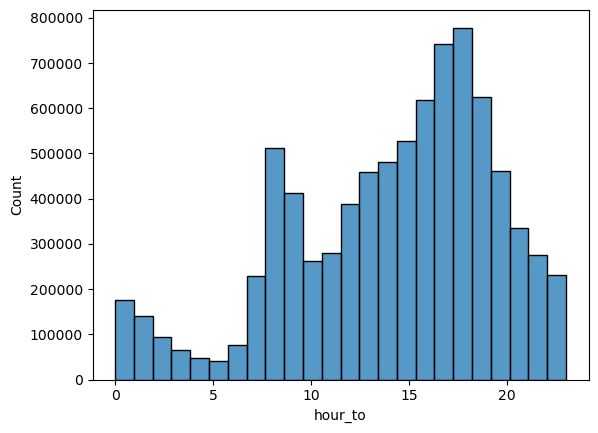

In [81]:
# Create histogram of the hour to column

sns.histplot(data = df_biketrips, x = 'hour_to', bins = 24)

# Exporting the histogram with axis showing
plt.savefig("histogram_hour_to.png", bbox_inches='tight') 

plt.show()

<AxesSubplot:xlabel='hour_to', ylabel='hour_to'>

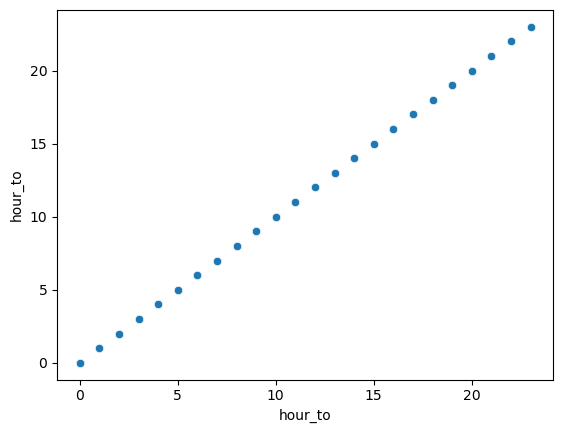

In [82]:
# Create a scatterplot of 'hour_to'to identify gaps

sns.scatterplot(x = 'hour_to', y = 'hour_to', data = df_biketrips)

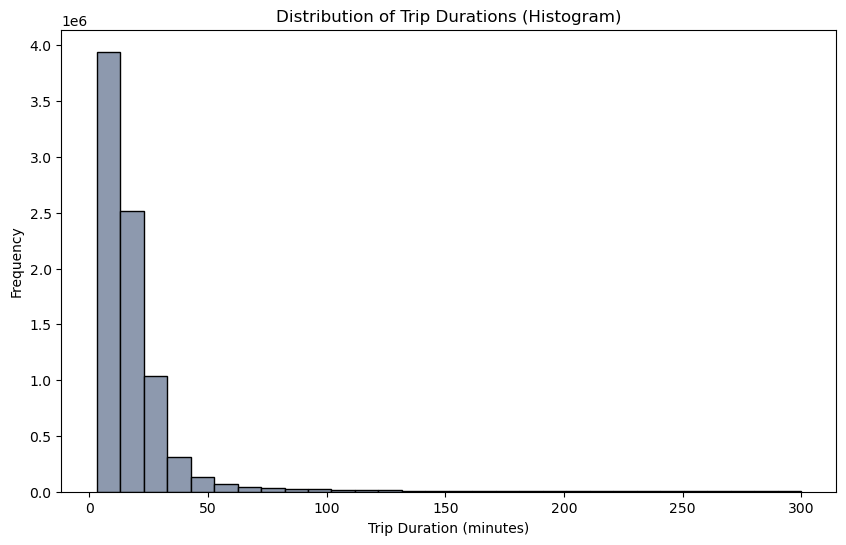

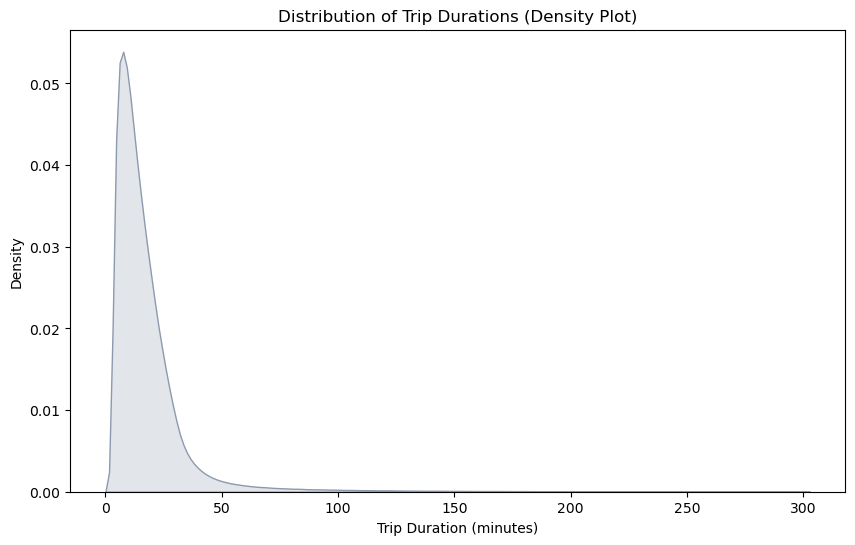

In [83]:
# Plot a histogram of trip durations
plt.figure(figsize=(10, 6))
plt.hist(df_biketrips['duration_trip_minutes'], bins=30, color = '#8D99AE', edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations (Histogram)')

# Alternatively, plot a density plot of trip durations
plt.figure(figsize=(10, 6))
sns.kdeplot(df_biketrips['duration_trip_minutes'], color = '#8D99AE', shade=True)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.title('Distribution of Trip Durations (Density Plot)')

# Exporting the correlation heatmap
plt.savefig("distributions_trip_duration.png", bbox_inches='tight') 

# Display the plots
plt.show()

<AxesSubplot:xlabel='duration_trip_minutes', ylabel='duration_trip_minutes'>

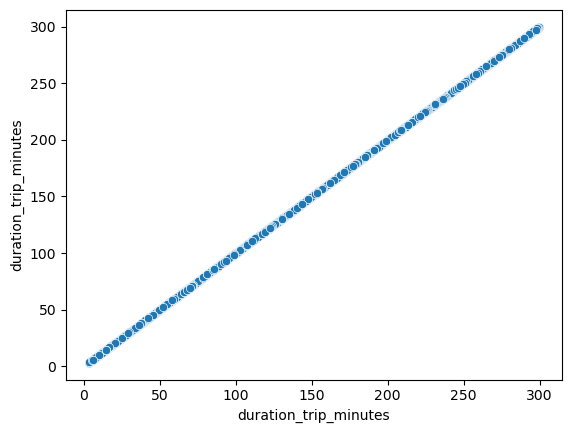

In [84]:
# Create a scatterplot of 'duration_trip_minutes' to identify gaps

sns.scatterplot(x = 'duration_trip_minutes', y = 'duration_trip_minutes', data = df_biketrips)

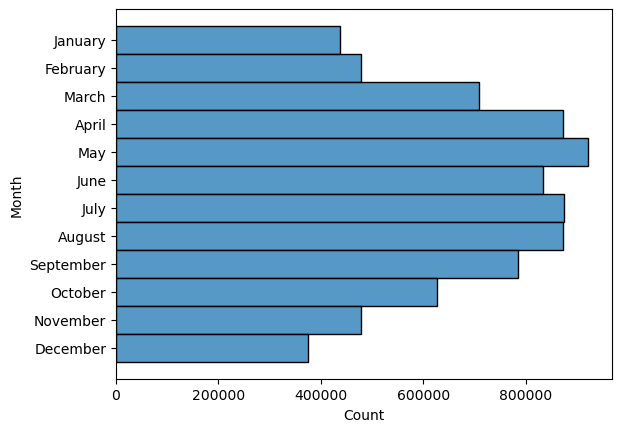

In [85]:
# Create histogram of the month column

sns.histplot(data = df_biketrips, y = 'Month', bins = 12)


# Exporting the histogram with axis showing
plt.savefig("histogram_month.png", bbox_inches='tight') 

plt.show()

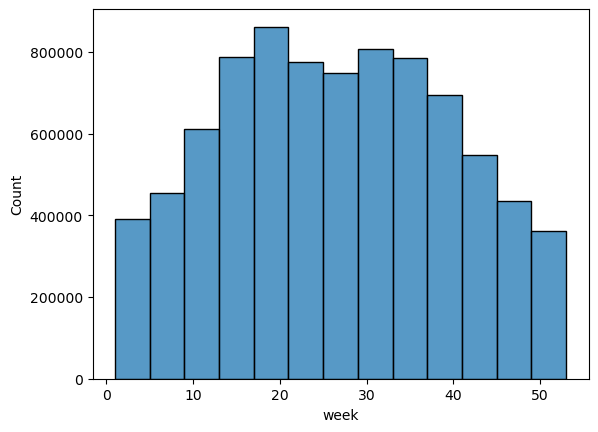

In [86]:
# Create histogram of the Week column

x = df_biketrips['datetime_from'].dt.isocalendar().week

sns.histplot(data = df_biketrips, x = x, bins = 13)

# Exporting the histogram with axis showing
plt.savefig("histogram_weekday.png", bbox_inches='tight') 

plt.show()

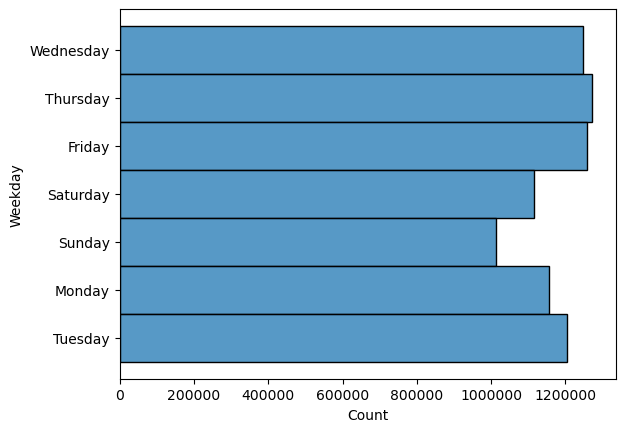

In [87]:
# Create histogram of the Weekday column

# Change the scientific axis notation
plt.ticklabel_format(style='plain')

sns.histplot(data = df_biketrips, y = 'Weekday', bins = 7)

# Exporting the histogram with axis showing
plt.savefig("histogram_weekday.png", bbox_inches='tight') 

plt.show()

### 4.2 Distribution Plots

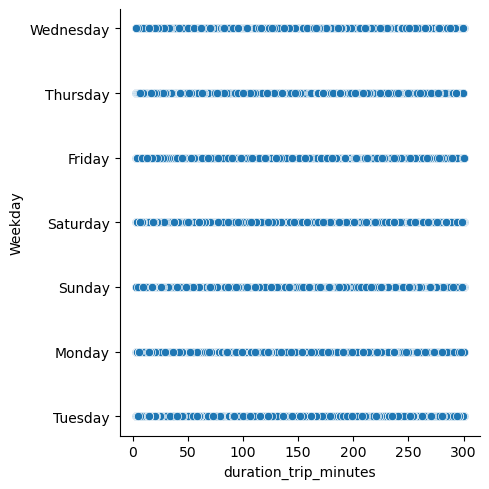

In [88]:
# Create a scatterplot of the trip duration column against the Weekday column

fg = sns.relplot(data = df_biketrips, x = 'duration_trip_minutes', y = 'Weekday')

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Replot_duration_day.png", bbox_inches='tight') 

plt.show()

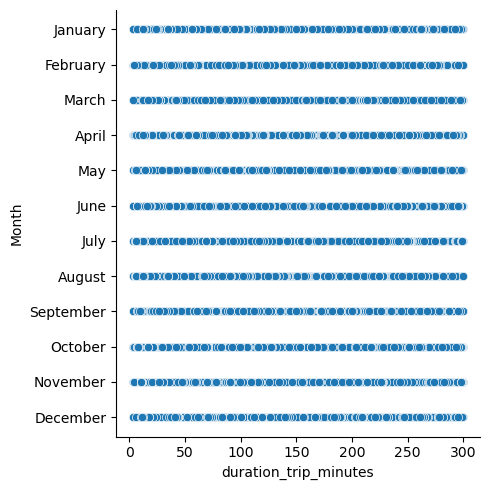

In [89]:
# Create a scatterplot of the trip duration column against the Month column

fg = sns.relplot(data = df_biketrips, x = 'duration_trip_minutes', y = 'Month')

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Replot_duration_month.png", bbox_inches='tight') 

plt.show()

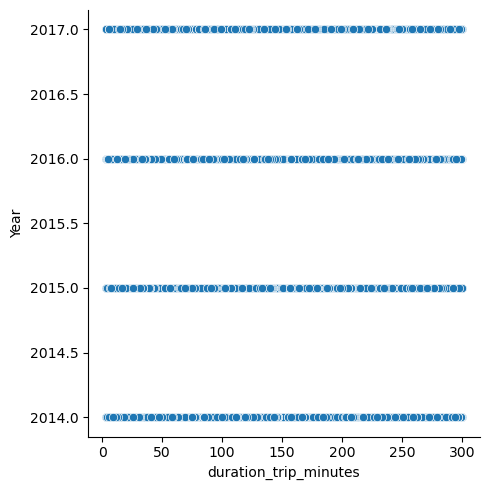

In [90]:
# Create a scatterplot of the trip duration column against the Year column

fg = sns.relplot(data = df_biketrips, x = 'duration_trip_minutes', y = 'Year')

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Replot_duration_year.png", bbox_inches='tight') 

plt.show()

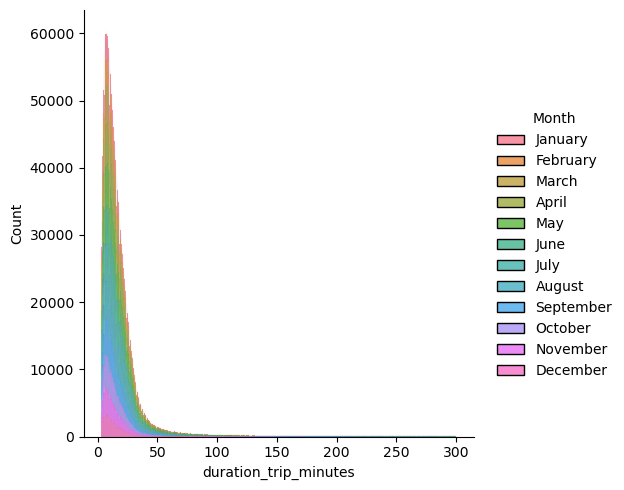

In [91]:
# Distribution of the trip duration coloured by Month

fg = sns.displot(data = df_biketrips, x = 'duration_trip_minutes', hue = 'Month',  multiple = 'stack')

# Exporting the distplot with axis showing
fg.tight_layout()
plt.savefig("Distplot_duration_month.png", bbox_inches='tight') 

plt.show()

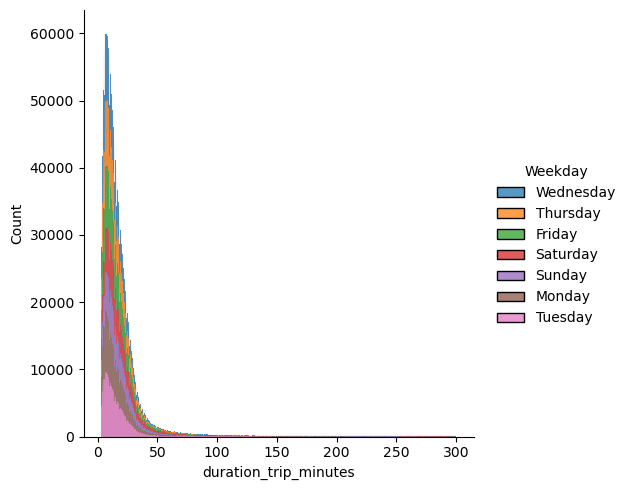

In [92]:
# Distribution of the trip duration coloured by Weekday

fg = sns.displot(data = df_biketrips, x = 'duration_trip_minutes', hue = 'Weekday',   multiple = 'stack')

# Exporting the distplot with axis showing
fg.tight_layout()
plt.savefig("Distplot_duration_day.png", bbox_inches='tight') 

plt.show()

## 5. Bike relocations

In [93]:
df_out = df_biketrips.groupby('end_station')['bike_relocated'].sum().sort_values(ascending = False).reset_index().head(20)
df_out

,end_station,bike_relocated
0,Landungsbrücke/Hafentor,13378
1,Am Kaiserkai/Großer Grasbrook,9789
2,Jungfernstieg / Neuer Jungfernstieg,9715
3,Jungfernstieg / Ballindamm,8366
4,Mannesallee/Veringstraße,7163
5,Saarlandstraße/Wiesendamm,6199
6,Lortzingstraße/Friedrichsberger Straße,6043
7,Rothenburgsort/Marktplatz/Lindleystraße,5394
8,Mönckebergstraße / Steintorwall,5285
9,Krausestraße/Eilbektal,4882


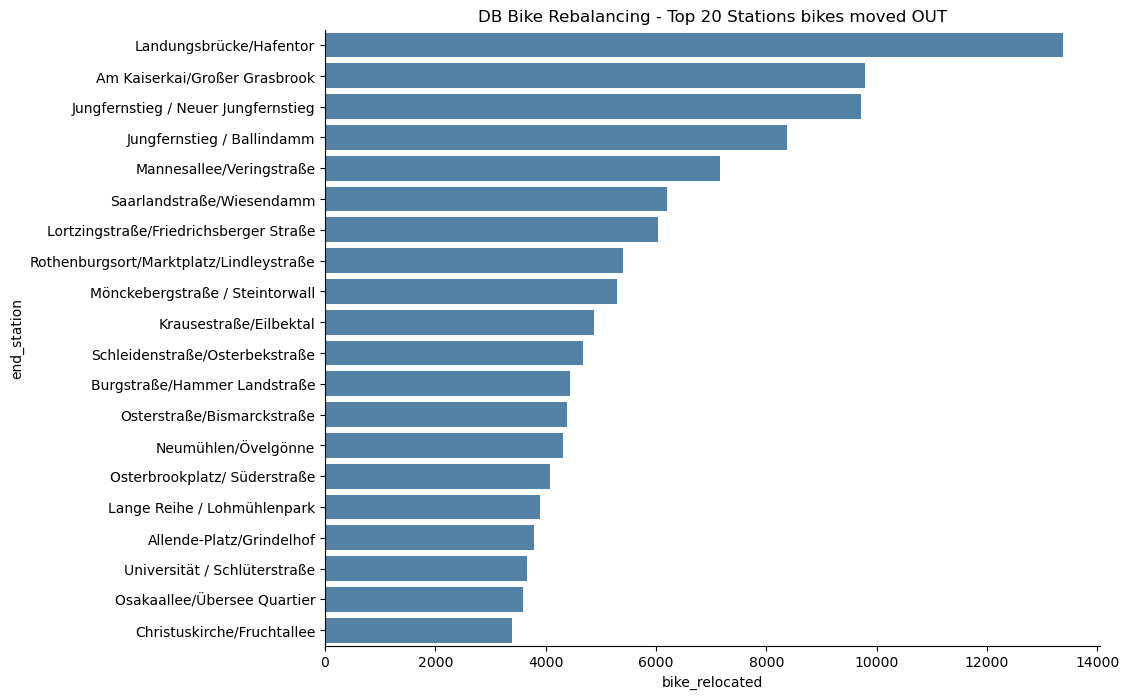

In [94]:
#df = df_biketrips.groupby('end_station')['relocated'].sum().sort_values(ascending = False).head(20)
X = df_out['bike_relocated']
Y = df_out['end_station']

plt.figure(figsize=(10,8))
plt.title('DB Bike Rebalancing - Top 20 Stations bikes moved OUT') 
plt.xlabel('Count of bikes moved') 
sns.barplot(x = X, y = Y, orient = "h", color = 'steelblue')

# remove the top and right spines
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Exporting the scatter plot with axis showing
fg.tight_layout()

plt.savefig("Rebalancing_bikes_out.png", bbox_inches='tight') 

plt.show()

The top five stations customers end up at (stations where bikes are moved out marked in bold):

* **Allende-Platz/Grindelhof**
* Schulterblatt/Eifflerstraße
* **Jungfernstieg / Ballindamm**
* Goldbekplatz / Semperstraße
* **Landungsbrücke/Hafentor**

In [95]:
df_in = df_biketrips.groupby('start_station')['bike_inserted'].sum().sort_values(ascending = False).reset_index().head(20)
df_in

,start_station,bike_inserted
0,Hauptbahnhof West / Glockengießer Wall,16857
1,Hauptbahnhof Ost / Hachmannplatz,14598
2,Bahnhof Altona West / Busbahnhof,10635
3,Berliner Tor / Berlinertordamm,7648
4,Bahnhof Altona Ost/Max-Brauer-Allee,7646
5,U-Bahn Schlump,6797
6,Schleidenstraße/Osterbekstraße,6288
7,Lohmühlenstraße / Steindamm,6224
8,Saarlandstraße/Wiesendamm,5818
9,Lange Reihe / Lohmühlenpark,4934


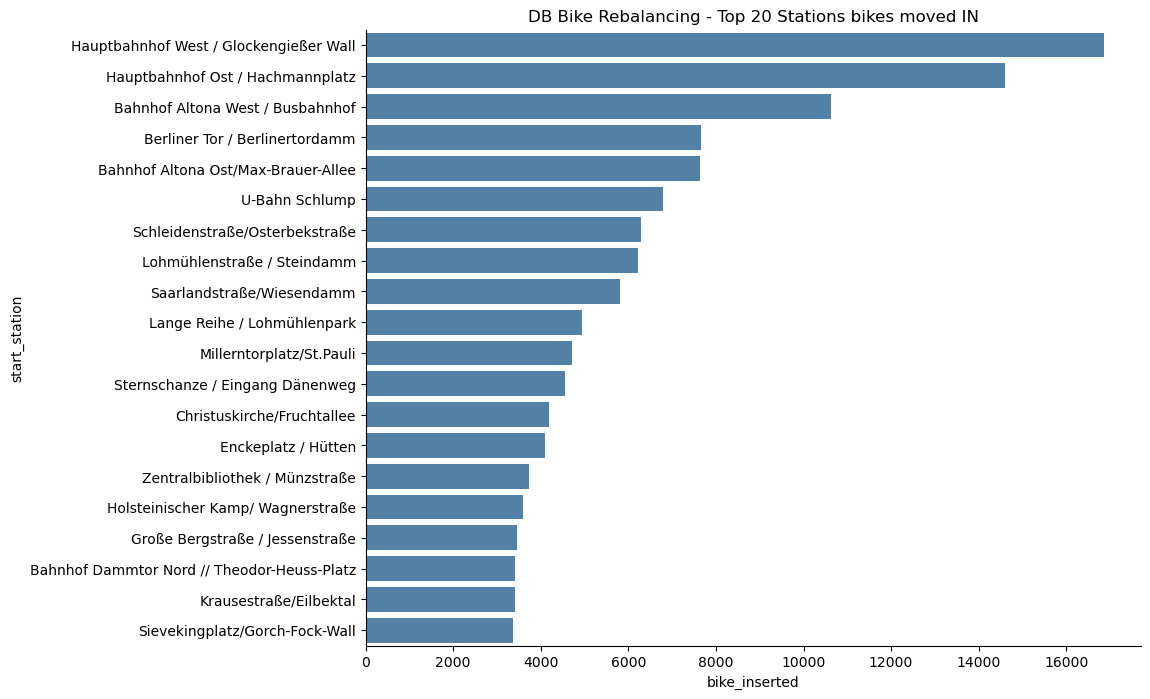

In [96]:
#df = df_biketrips.groupby('end_station')['relocated'].sum().sort_values(ascending = False).head(20)
X = df_in['bike_inserted']
Y = df_in['start_station']

plt.figure(figsize=(10,8))
plt.title('DB Bike Rebalancing - Top 20 Stations bikes moved IN') 
plt.xlabel('Count of bikes moved') 
sns.barplot(x = X, y = Y, orient = "h", color = 'steelblue' )

# remove the top and right spines
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Exporting the scatter plot with axis showing
fg.tight_layout()
plt.savefig("Rebalancing_bikes_in.png", bbox_inches='tight') 

plt.show()

The top five stations customers start out from:
* Allende-Platz/Grindelhof                  
* Schulterblatt/Eifflerstraße               
* Goldbekplatz / Semperstraße               
* Jungfernstieg / Ballindamm                
* Mundsburg / Schürbeker Straße    

**It wuld appear that customers start out from these Bahnhof stations and Berliner Tor, but they are not popular destnations**